In [1]:
from __future__ import print_function
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

np.random.seed(538)
plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

mnist = load_digits()

img_rows, img_cols = 8, 8

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.33, random_state=1945)

# Mengubah dimensi data menjadi n x pixels
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

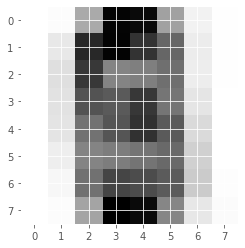

In [3]:
plt.imshow(X_train.mean(axis=0).reshape(img_rows, img_cols), cmap='Greys')
plt.xticks(range(8))
plt.yticks(range(8))
plt.show()

In [4]:
print(X_train.shape)
print(X_test.shape)

(1203, 64)
(594, 64)


In [5]:
pca = PCA(2) # kita akan mengambil dua komponen paling pentingnya saja
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) # X_test ditransform aja ya jangan di-fit lagi

In [6]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1203, 2)
(594, 2)


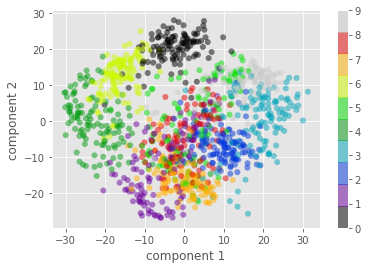

In [7]:
# Kode dari http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

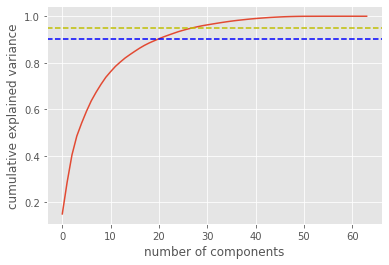

In [8]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(.90, linestyle='--', c='b')
plt.axhline(.95, linestyle='--', c='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

2.67 ms ± 400 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Akurasi: 0.8333333333333334


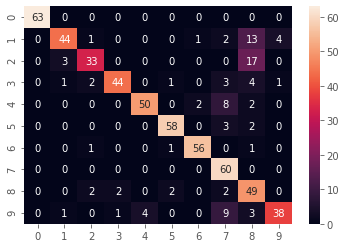

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

clf = GaussianNB()
%timeit -n 1 clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Akurasi:', accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d');

7.31 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.29 ms ± 70.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Akurasi: 0.9326599326599326


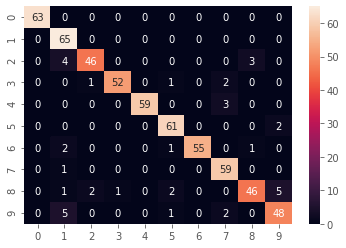

In [10]:
pca = PCA(.9) # PCA dengan komponen yang menjelaskan 90% variansi
%timeit -n 1 pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = GaussianNB()
%timeit -n 1 clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print('Akurasi:', accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d');